必要なライブラリをインストールする

In [1]:
!pip install nibabel
!pip install nilearn

ERROR: Operation cancelled by user
ERROR: Operation cancelled by user


In [2]:
# import library
import nibabel as nib
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import display
from nilearn import plotting
import ipywidgets as widgets

統計量の確認

In [3]:
nifti_data = nib.load("sp2_label_512_v1.0.0.nii.gz")

header_info = nifti_data.header
data_shape = nifti_data.shape
affine = nifti_data.affine
data_type = header_info.get_data_dtype()

header_info, data_shape, affine, data_type


(<nibabel.nifti1.Nifti1Header at 0x7e4ca508ac50>,
 (300, 360, 220),
 array([[  0.1       ,   0.        ,  -0.        , -15.09119987],
        [  0.        ,   0.1       ,  -0.        , -19.59397507],
        [  0.        ,   0.        ,   0.1       , -11.34401989],
        [  0.        ,   0.        ,   0.        ,   1.        ]]),
 dtype('<f8'))

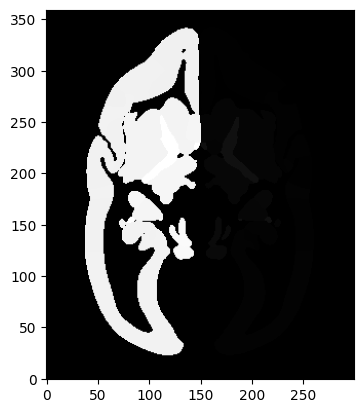

In [4]:
data = nifti_data.get_fdata()
axial_slice = data[:, :, data.shape[2] // 2]

plt.imshow(axial_slice.T, cmap="gray", origin="lower")
plt.show()

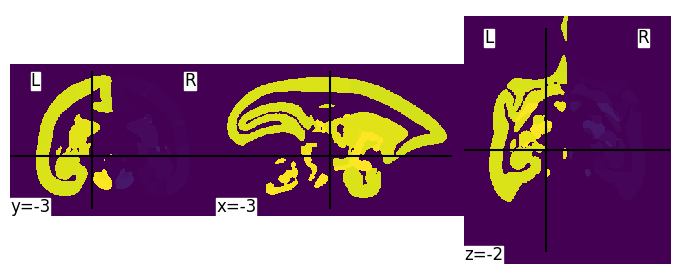

In [5]:
plotting.plot_img("sp2_label_512_v1.0.0.nii.gz")
plotting.show()

左半球が暗く見えるのはデータセットの元々の性質っぽさそう.

各軸の座標を変化させたときの図をアニメーションで出力

In [6]:
def create_animation(axis='z'):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.axis('off')

    if axis == 'x':
        image = ax.imshow(data[data.shape[0] // 2, :, :], cmap="gray", origin="lower")
        def update(frame):
            image.set_array(data[frame, :, :])
            return image,
        ani = FuncAnimation(fig, update, frames=np.arange(1, data.shape[0]), blit=True)

    elif axis == 'y':
        image = ax.imshow(data[:, data.shape[1] // 2, :], cmap="gray", origin="lower")
        def update(frame):
            image.set_array(data[:, frame, :])
            return image,
        ani = FuncAnimation(fig, update, frames=np.arange(1, data.shape[1]), blit=True)

    else: # 'z'
        image = ax.imshow(data[:, :, data.shape[2] // 2], cmap="gray", origin="lower")
        def update(frame):
            image.set_array(data[:, :, frame])
            return image,
        ani = FuncAnimation(fig, update, frames=np.arange(1, data.shape[2]), blit=True)

    filename = f'animation_move_{axis}label.mp4'
    ani.save(filename, writer='ffmpeg', fps=30)
    plt.close(fig)
    return filename

In [8]:
create_animation('x')
create_animation('y')
create_animation('z')

'animation_move_zlabel.mp4'

スライダーで扱えるように調整

In [9]:
nifti_data = nib.load("sp2_label_512_v1.0.0.nii.gz")
data = nifti_data.get_fdata()

fig, ax = plt.subplots(figsize=(6, 6))
ax.axis('off')
image = ax.imshow(data[150, :, :], cmap="gray", origin="lower")
plt.close(fig)

def update_slices(x_slice, y_slice, z_slice):
    ax.imshow(data[x_slice, :, :], cmap="gray", origin="lower")
    display(fig)

x_slider = widgets.IntSlider(value=data.shape[0] // 2, min=0, max=data.shape[0]-1, description='X Slice:')
y_slider = widgets.IntSlider(value=data.shape[1] // 2, min=0, max=data.shape[1]-1, description='Y Slice:')
z_slider = widgets.IntSlider(value=data.shape[2] // 2, min=0, max=data.shape[2]-1, description='Z Slice:')
widgets.interactive(update_slices, x_slice=x_slider, y_slice=y_slider, z_slice=z_slider)


interactive(children=(IntSlider(value=150, description='X Slice:', max=299), IntSlider(value=180, description=…